In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
dfsalary = pd.read_csv('dfsalary.csv', index_col=0)

dfsalary

,ЗП_от,ЗП_до
1,100000.0,150000.0
3,150000.0,NaN
4,90000.0,120000.0
5,100000.0,160000.0
6,75000.0,NaN
...,...,...
1636,300000.0,NaN
1637,140000.0,NaN
1638,180000.0,250000.0
1639,180000.0,NaN


In [5]:
dfsalary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 1 to 1640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ЗП_от   1048 non-null   float64
 1   ЗП_до   782 non-null    float64
dtypes: float64(2)
memory usage: 29.6 KB


In [6]:
dfsalary = dfsalary.dropna()

In [7]:
dfsalary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 1 to 1640
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ЗП_от   566 non-null    float64
 1   ЗП_до   566 non-null    float64
dtypes: float64(2)
memory usage: 13.3 KB


In [8]:
x = dfsalary['ЗП_от']
y = dfsalary['ЗП_до']

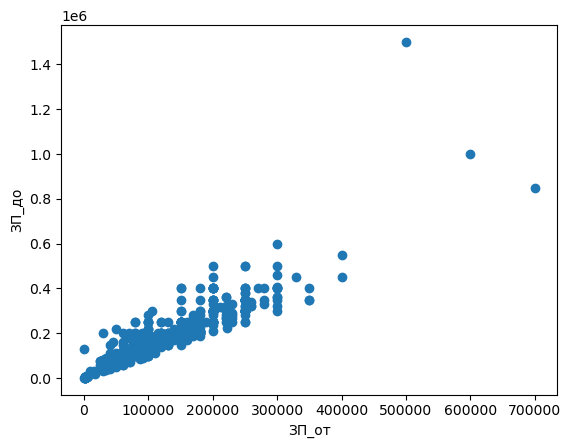

In [9]:
plt.scatter(x, y)
plt.xlabel('ЗП_от') 
plt.ylabel('ЗП_до')
plt.show()

In [10]:
import time

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

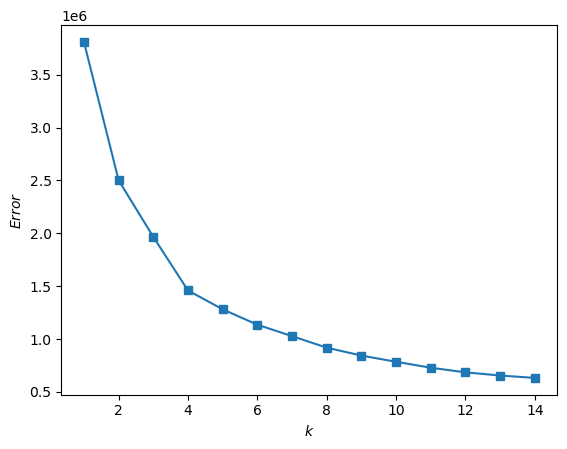

In [11]:
#Определите релевантное колчичество кластеров, используя метод локтя

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(dfsalary)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 15), inertia, marker='s');
plt.xlabel('$k$') 
plt.ylabel('$Error$');

По перелому графика определим оптимальное количество кластеров. В данном случае релевантно брать количество кластеров равное 4. Далее при обучении возьмем гиперпараметр k равным именно этому числу. 

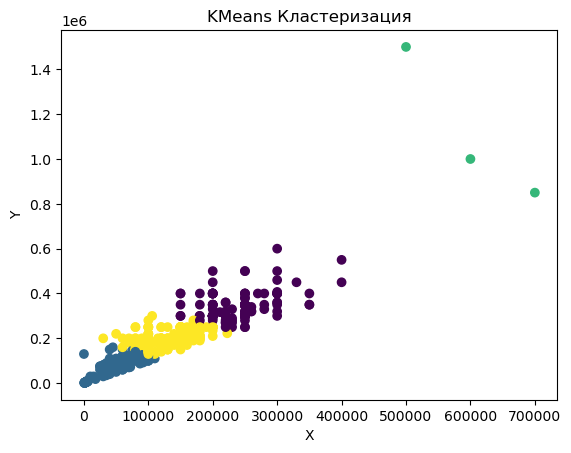

Время выполнения: 0.3853740692138672


In [12]:
start = time.time()

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(dfsalary)

plt.scatter(x, y, c=clusters, cmap='viridis')
plt.title('KMeans Кластеризация')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

end = time.time() - start #время работы программы
print('Время выполнения:',end)

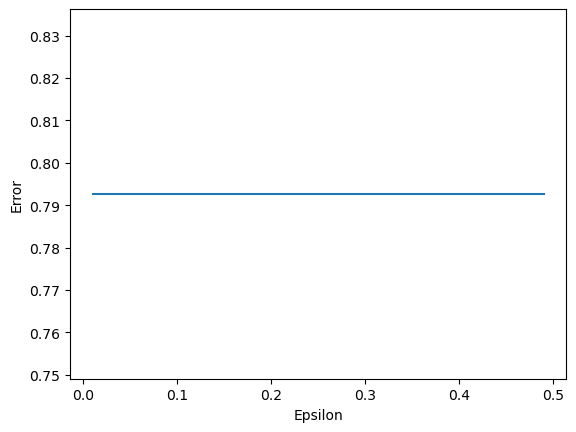

In [13]:
#Определите релевантное значение для eps, используя метод перебора значений

# Список eps для перебора
eps_values = np.arange(0.01, 0.5, 0.02) 

errors = []

for e in eps_values:
    dbscan = DBSCAN(eps=e, min_samples=3)
    
    clusters = dbscan.fit_predict(dfsalary)
    
    silhouette = silhouette_score(dfsalary, clusters)
    
    errors.append(1 - silhouette)

plt.plot(eps_values, errors)
plt.xlabel("Epsilon")
plt.ylabel("Error")
plt.show()

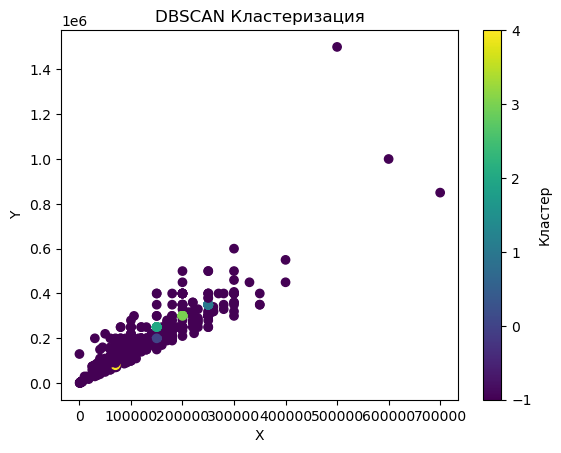

Время выполнения: 1.0661888122558594


In [15]:
start = time.time()

dbscan = DBSCAN(eps=0.1, min_samples=15)
clusters = dbscan.fit_predict(dfsalary)

plt.scatter(x, y, c=clusters)
plt.title('DBSCAN Кластеризация')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Кластер')
plt.show()

end = time.time() - start 
print('Время выполнения:',end)

как можно было заметить выше настройка гиперпараметра эпсилон не влияет на показаеть ошибки. Влияет только минимально количество наблюдений для образование кластера. (чем меньше гиперпараметр min_samples тем меньше значение 1 - силуэт) 
то что такая кластреризация плохо работает на нашей выборке можно объяснить тем, что выборка имеет очень большую плотность, а метод как раз работает определяет класторы на основе плотности и между разными кластерами должно быть пространство чтобы их определили как различные класторы. 
в данном случае большинство даных расположены рядом друг с другом, что мешает работе метода

далее посмотрим на иерархическую кластеризацию, в которой есть два гиперпараметра: количество кластеров и метод подсчета растояния между точками (‘ward’, ‘complete’, ‘average’, ‘single’)

In [16]:
varients = ['ward', 'complete', 'average', 'single']

list(varients)

['ward', 'complete', 'average', 'single']

In [17]:
from sklearn.metrics import pairwise_distances

In [18]:
# Функция для ошибки
def calculate_sse(data, labels):
    sse = 0
    for label in np.unique(labels):
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

In [19]:
dfsalary1 = dfsalary.to_numpy()

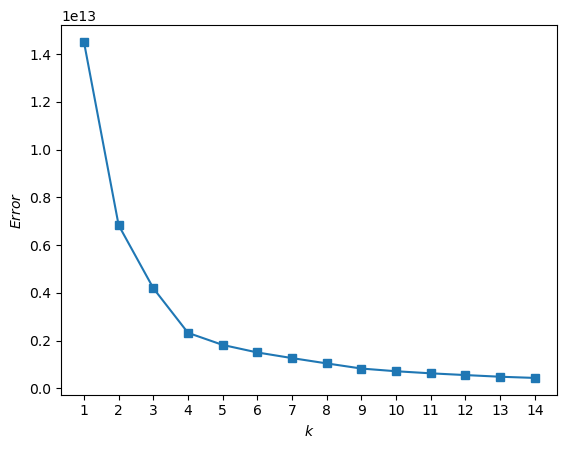

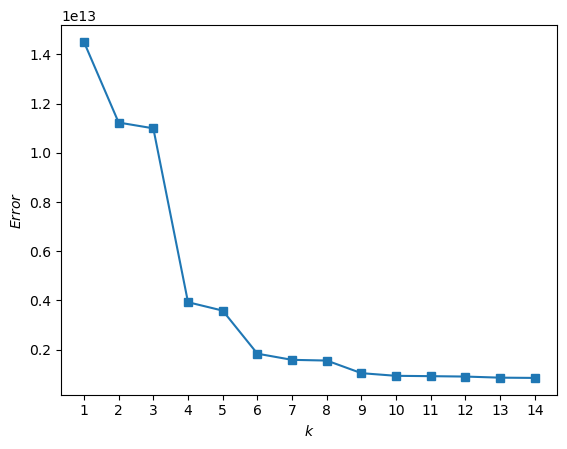

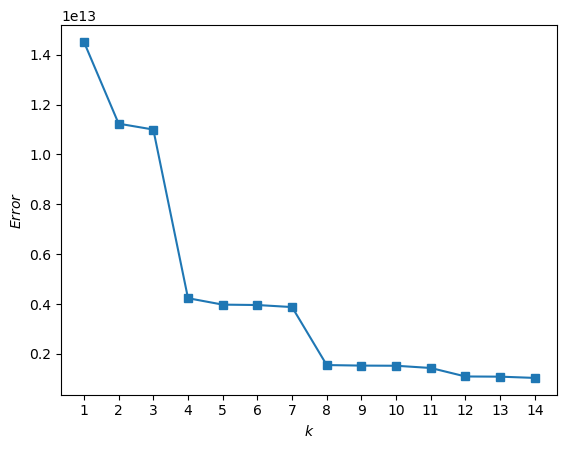

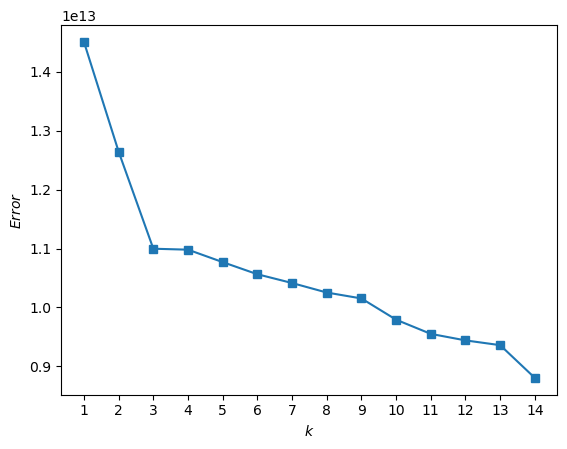

In [20]:
for way in range(4):    
    sse_values = []
    for k in range(1, 15):
        model = AgglomerativeClustering(n_clusters=k, linkage=varients[way])
        labels = model.fit_predict(dfsalary1)
        sse = calculate_sse(dfsalary1, labels)
        sse_values.append(sse)

    plt.plot(range(1, 15), sse_values, marker='s')
    plt.xlabel('$k$')
    plt.ylabel('$Error$')
    plt.xticks(range(1, 15))
    plt.show()

видно что лучше брать ward и количество кластеров равное 4

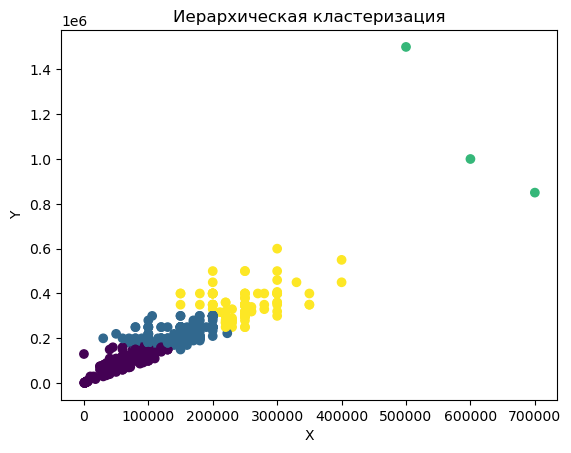

Время выполнения: 0.3304879665374756


In [21]:
start = time.time()

clustering = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(dfsalary)

plt.scatter(x, y, c=clustering.labels_, cmap='viridis')
plt.title('Иерархическая кластеризация')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

end = time.time() - start 
print('Время выполнения:',end)

ну DBSCAN это скам. А все остальное нормик. Иерархической кластеризация справилась чутка быстрее с точки зрения времени

# Данные для нейросети

In [30]:
df = pd.read_csv('df.csv')

In [31]:
df.head()

,Unnamed: 0,Организация,Описание,Тип_занятости,Локация,Ключевые навыки,Вакансия,ЗП_от,ЗП_до,Валюта,Профессия_id,Требования,Обязанности,Расписание,Опыт,Профессия,ЗП_сред,ЗП_сред_RUB,Локация_2,Сфера
0,1,Инновационная Экологическая Платформа,Ecoplatform - один из лидеров рынка фандоматов...,FULL_TIME,Москва,['React'],Frontend developer (React),100000.0,150000.0,RUR,96,Опыт разработки мобильных приложений на React ...,Разработка простых интеграций для программы ло...,remote,between1And3,"Программист, разработчик",125000.0,125000.0,Москва,Прога
1,3,НИТУ МИСИС,Университет науки и технологий МИСИС является ...,FULL_TIME,Москва,[],Data Scientist,150000.0,NaN,RUR,96,Высшее образование. Качественный опыт работы в...,Участие в проектировании и реализации решений ...,fullDay,between1And3,"Программист, разработчик",150000.0,150000.0,Москва,Прога
2,4,ООО «Вин-Маркет»,Кто мы: Aftermarket-DATA © — разработчик прогр...,FULL_TIME,Нижний Новгород,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",Python-программист (Backend),90000.0,120000.0,RUR,96,"Python. PHP. HTML, CSS. JavaScript, jQuery. GI...",Участвовать во всех этапах проекта: от проекти...,fullDay,between1And3,"Программист, разработчик",105000.0,105000.0,Другое,Прога
3,5,Data-Power,Требуемый опыт работы: 3–6 лет Полная занятост...,FULL_TIME,Санкт-Петербург,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",Разработчик Power BI,100000.0,160000.0,RUR,96,...в <highlighttext>аналитике</highlighttext>:...,Разработка и внедрение <highlighttext>аналитик...,fullDay,between1And3,"Программист, разработчик",130000.0,130000.0,Санкт-Петербург,Прога
4,6,RTNO,"Привет! Мы компания RTNO, занимаемся аналитико...",FULL_TIME,Москва,"['Python', 'Сбор и анализ информации', 'Анализ...",Аналитик крипто проектов,75000.0,NaN,RUR,10,Поддержание актуальных знаний о развитии рынка...,Ежедневный анализ децентрализованных и централ...,fullDay,noExperience,Аналитик,75000.0,75000.0,Москва,Аналитика


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1264 non-null   int64  
 1   Организация      1264 non-null   object 
 2   Описание         1264 non-null   object 
 3   Тип_занятости    1264 non-null   object 
 4   Локация          1264 non-null   object 
 5   Ключевые навыки  1264 non-null   object 
 6   Вакансия         1264 non-null   object 
 7   ЗП_от            1048 non-null   float64
 8   ЗП_до            782 non-null    float64
 9   Валюта           1264 non-null   object 
 10  Профессия_id     1264 non-null   int64  
 11  Требования       1264 non-null   object 
 12  Обязанности      1264 non-null   object 
 13  Расписание       1264 non-null   object 
 14  Опыт             1264 non-null   object 
 15  Профессия        1264 non-null   object 
 16  ЗП_сред          1264 non-null   float64
 17  ЗП_сред_RUB   

In [137]:
dfs = df.drop(['Организация', 'Описание', 'Локация', 'Вакансия', 'ЗП_от', 'ЗП_до', 'Профессия_id', 'Требования', 'Обязанности', 'ЗП_сред'], axis=1)

In [138]:
dfs

,Тип_занятости,Ключевые навыки,Валюта,Расписание,Опыт,Профессия,ЗП_сред_RUB,Локация_2,Сфера
1,FULL_TIME,['React'],RUR,remote,between1And3,"Программист, разработчик",125000.0,Москва,Прога
3,FULL_TIME,[],RUR,fullDay,between1And3,"Программист, разработчик",150000.0,Москва,Прога
4,FULL_TIME,"['PHP', 'Git', 'MySQL', 'Redis', 'REST', 'SOAP...",RUR,fullDay,between1And3,"Программист, разработчик",105000.0,Другое,Прога
5,FULL_TIME,"['DAX', 'PostgreSQL', 'SQL', 'Power BI', 'Powe...",RUR,fullDay,between1And3,"Программист, разработчик",130000.0,Санкт-Петербург,Прога
6,FULL_TIME,"['Python', 'Сбор и анализ информации', 'Анализ...",RUR,fullDay,noExperience,Аналитик,75000.0,Москва,Аналитика
...,...,...,...,...,...,...,...,...,...
1636,FULL_TIME,"['Java', 'Scrum', 'PostgreSQL', 'JUnit', 'Упра...",RUR,fullDay,between3And6,Тестировщик,300000.0,Санкт-Петербург,Прога
1637,FULL_TIME,"['Dart', 'Flutter', 'SOLID', 'Android', 'iOS',...",RUR,remote,between1And3,"Программист, разработчик",140000.0,Другое,Прога
1638,FULL_TIME,[],RUR,remote,between3And6,"Программист, разработчик",215000.0,Москва,Прога
1639,FULL_TIME,"['MySQL', 'Symfony', 'ООП', 'PHP', 'Redis', 'P...",RUR,remote,between3And6,"Программист, разработчик",180000.0,Другое,Прога


In [139]:
dfs.nunique()

Тип_занятости        4
Ключевые навыки    930
Валюта               3
Расписание           3
Опыт                 4
Профессия           20
ЗП_сред_RUB        169
Локация_2            6
Сфера                2
dtype: int64

In [141]:
#В столбце с ключевыми навыками лежат не списки, а строки. Преобразуем их в списки с навыками:
dfs['Ключевые навыки'] = dfs['Ключевые навыки'].apply(eval)

In [150]:
ohe_data = pd.get_dummies(dfs, columns = ['Тип_занятости', 'Валюта', 'Расписание', 'Опыт', 'Профессия', 'Локация_2', 'Сфера'])
print(ohe_data)

                                        Ключевые навыки  ЗП_сред_RUB  \
1                                               [React]     125000.0   
3                                                    []     150000.0   
4          [PHP, Git, MySQL, Redis, REST, SOAP, Python]     105000.0   
5     [DAX, PostgreSQL, SQL, Power BI, Power Query, ...     130000.0   
6     [Python, Сбор и анализ информации, Анализ данн...      75000.0   
...                                                 ...          ...   
1636  [Java, Scrum, PostgreSQL, JUnit, Управление ко...     300000.0   
1637  [Dart, Flutter, SOLID, Android, iOS, ООП, Scru...     140000.0   
1638                                                 []     215000.0   
1639  [MySQL, Symfony, ООП, PHP, Redis, PostgreSQL, ...     180000.0   
1640                                                 []     115000.0   

      Тип_занятости_FULL_TIME  Тип_занятости_INTERN  Тип_занятости_PART_TIME  \
1                           1                     0    

In [200]:
ohe_data.to_csv('ohe_data.csv')